# Lista 03
#### Nome: João Mateus Dias do Carmo
#### Matrícula: 390187

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [4]:
colunas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']

In [5]:
read_csv = pd.read_csv("iris-dataset.csv",names=colunas)

## Análise dos Dados

In [6]:
read_csv.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
read_csv.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA19DEC2B0>,
      dtype=object)

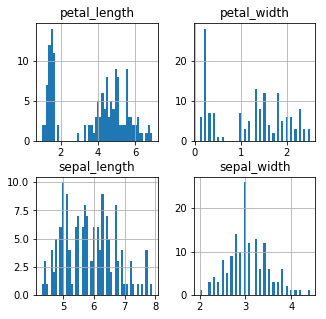

In [8]:
read_csv.hist(bins=50, figsize=(5,5))

In [9]:
read_csv.corr().style.set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.11,0.87,0.82
sepal_width,-0.11,1,-0.42,-0.36
petal_length,0.87,-0.42,1,0.96
petal_width,0.82,-0.36,0.96,1


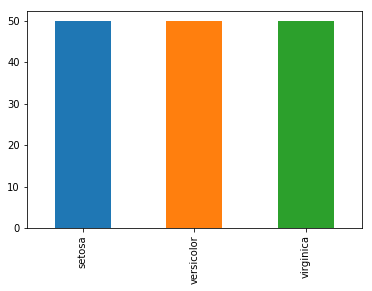

In [10]:
read_csv["label"].value_counts().plot(kind='bar');

In [11]:
read_csv = read_csv[(read_csv["label"]=="setosa")|(read_csv["label"]=="virginica")]

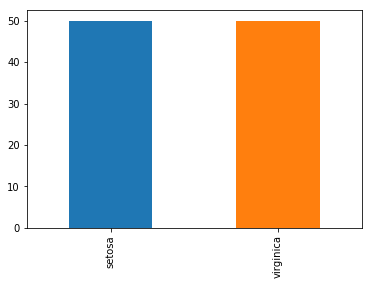

In [12]:
read_csv["label"].value_counts().plot(kind='bar')

In [13]:
read_csv['label'] = np.where(read_csv['label'] == 'setosa', 1, -1)

In [14]:
read_csv

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [4]:
X = read_csv.values[:, :-1]
y = read_csv.values[:, -1]

NameError: name 'read_csv' is not defined

In [16]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [18]:
RanSta = np.random.RandomState(1)
IndexShu = RanSta.permutation(X.shape[0])
IndexShu

array([80, 84, 33, 81, 93, 17, 36, 82, 69, 65, 92, 39, 56, 52, 51, 32, 31,
       44, 78, 10,  2, 73, 97, 62, 19, 35, 94, 27, 46, 38, 67, 99, 54, 95,
       88, 40, 48, 59, 23, 34, 86, 53, 77, 15, 83, 41, 45, 91, 26, 98, 43,
       55, 24,  4, 58, 49, 21, 87,  3, 74, 30, 66, 70, 42, 47, 89,  8, 60,
        0, 90, 57, 22, 61, 63,  7, 96, 13, 68, 85, 14, 29, 28, 11, 18, 20,
       50, 25,  6, 71, 76,  1, 16, 64, 79,  5, 75,  9, 72, 12, 37])

In [19]:
X = X[IndexShu]
y = y[IndexShu]

In [20]:
X[:5]

array([[7.4, 2.8, 6.1, 1.9],
       [6.1, 2.6, 5.6, 1.4],
       [5.5, 4.2, 1.4, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.8, 3.2, 5.9, 2.3]])

In [21]:
y[:5]

array([-1., -1.,  1., -1., -1.])

In [37]:
lines_dataSet = 150
porcent = 5
index = round(((porcent*lines_dataSet)/100))
X_train = X[:index]
y_train = y[:index]
X_test = X[index:]
y_test = y[index:]
index

8

In [38]:
X_train

array([[7.4, 2.8, 6.1, 1.9],
       [6.1, 2.6, 5.6, 1.4],
       [5.5, 4.2, 1.4, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.8, 3.2, 5.9, 2.3],
       [5.1, 3.5, 1.4, 0.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.4, 2.8, 5.6, 2.2]])

In [39]:
y_train

array([-1., -1.,  1., -1., -1.,  1.,  1., -1.])

In [40]:
np.average(X_train), np.average(y_train)

(3.7906250000000004, -0.25)

In [41]:
np.average(X_test), np.average(y_test)

(3.3758152173913043, 0.021739130434782608)

## Perceptron

In [42]:
ModelPer = Perceptron(eta=0.00001,n_iter=20)

In [43]:
ModelPer.fit(X_train, y_train)

In [49]:
y_predPer = ModelPer.predict(X_test)

In [50]:
accuracyPerceptron = sum(y_predPer == y_test) / y_test.shape[0]

In [51]:
accuracyPerceptron

0.8260869565217391

## Adaline com Gradiente Descendente

In [77]:
ModelAda =  AdalineGD(eta=0.00001,n_iter=20)

In [78]:
ModelAda.fit(X_train,y_train)

In [1]:
y_predAda = ModelAda.predict(X_test)

NameError: name 'ModelAda' is not defined

In [80]:
accuracyAda = sum(y_predAda == y_test) / y_test.shape[0]

In [81]:
accuracyAda

0.4891304347826087